In [49]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

personas_entrenar = pd.read_csv('data/labels_training_set.csv', low_memory=False)
informacion = pd.read_csv('data/events_up_to_01062018.csv', low_memory= False)
info_clasificar = personas_entrenar.merge(informacion, on = 'person', how = 'inner')

person        980
frecuencia    980
label         980
dtype: int64
         person  frecuencia  label
15061  c7cc2c23        1561      1
4568   3cd434ec        1480      1
1776   171e75cb        1212      1
13981  b9628c41        1166      1
17343  e55f7d70        1055      1
18343  f2408126         991      1
16216  d6db0770         859      1
3525   2f729bc3         845      1
9966   846fde56         833      1
11694  9b8d001b         825      1
person        18434
frecuencia    18434
label         18434
dtype: int64
         person  frecuencia  label
19409  ffee0f18        3458      0
11805  9ccf882a        2850      0
8083   6abd2bf1        2844      0
13379  b1f4dbf6        2475      0
18841  f8b80f26        2163      0
8228   6ca3126e        2006      0
11401  97b0c0d1        1933      0
14460  bfb74b38        1915      0
15145  c8e25442        1870      0
211    02f14240        1798      0
99684
1072202


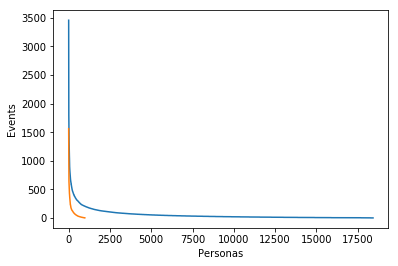

In [55]:
info = personas_entrenar.merge(informacion, on = 'person', how = 'inner')
info = info[['person','label']]
info['frecuencia'] = 1
data = pd.DataFrame({'frecuencia': info.groupby('person').aggregate(sum)['frecuencia'],'label': info.groupby('person').aggregate(sum)['label']}).reset_index()
data['label'] = data.label.apply(lambda x: 1 if x > 0 else 0)
data = data.sort_values(by= 'frecuencia', ascending= False)
#info.groupby('person').sum()['frecuencia'].sort().plot(figsize=(14,4));

#data= data[(data['label'] == 1) | ((data['frecuencia'] < 250) & (data['label'] == 0))]


data_1 = data[data['label'] == 1]
data_0 = data[data['label'] == 0]


print(data_1.count())
print(data_1.head(10))

print(data_0.count())
print(data_0.head(10))
print(data_1['frecuencia'].sum())
print(data_0['frecuencia'].sum())

plt.plot(data_0['frecuencia'].tolist())
plt.plot(data_1['frecuencia'].tolist())
plt.ylabel('Events')
plt.xlabel('Personas')
plt.show()


In [ ]:
df = pd.DataFrame()